## Simple Data Science Case: Bike Sharing

 the business task is defined as searching for differences in the two identified kinds of users in order to make a focused marketing campaign to the “casual” users in order for them to change to the annual subscription, or resumed in a question:
 
https://www.kaggle.com/code/julenaranguren/cyclistic-bike-share-a-case-study/notebook

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
os.listdir('../data/Bike Sharing/')

['202011-divvy-tripdata.csv',
 '202012-divvy-tripdata.csv',
 '202101-divvy-tripdata.csv',
 '202102-divvy-tripdata.csv',
 '202103-divvy-tripdata.csv',
 '202010-divvy-tripdata.csv']

In [3]:
df_dict = {}
for i, filename in enumerate(os.listdir('../data/Bike Sharing/')):
    df_dict[i] = pd.read_csv('../data/Bike Sharing/' + filename)

In [4]:
for i, df in df_dict.items():
    print(df.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


In [5]:
df = pd.DataFrame()

for i, df_i in df_dict.items():
    df = pd.concat((df, df_i), axis=0)

In [6]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,41.894434,-87.623379,casual
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,41.900675,-87.662480,casual
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,41.872054,-87.629550,casual
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,41.917744,-87.691392,casual
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,41.876448,-87.620338,casual


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154894 entries, 0 to 388652
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             1154894 non-null  object 
 1   rideable_type       1154894 non-null  object 
 2   started_at          1154894 non-null  object 
 3   ended_at            1154894 non-null  object 
 4   start_station_name  1060154 non-null  object 
 5   start_station_id    1059837 non-null  object 
 6   end_station_name    1046915 non-null  object 
 7   end_station_id      1046682 non-null  object 
 8   start_lat           1154894 non-null  float64
 9   start_lng           1154894 non-null  float64
 10  end_lat             1153541 non-null  float64
 11  end_lng             1153541 non-null  float64
 12  member_casual       1154894 non-null  object 
dtypes: float64(4), object(9)
memory usage: 123.4+ MB


In [8]:
df.describe(include='object')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
count,1154894,1154894,1154894,1154894,1060154,1059837.0,1046915,1046682.0,1154894
unique,1154685,3,1048559,1042538,691,1343.0,690,1344.0,2
top,B8FD82D36817B095,docked_bike,2020-10-09 17:49:24,2020-10-14 07:23:00,Clark St & Elm St,176.0,Clark St & Elm St,176.0,member
freq,2,420097,11,13,10724,5980.0,10740,5962.0,779422


In [9]:
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name     94740
start_station_id       95057
end_station_name      107979
end_station_id        108212
start_lat                  0
start_lng                  0
end_lat                 1353
end_lng                 1353
member_casual              0
dtype: int64

In [10]:
df[df.duplicated(subset='ride_id')]
df[df['ride_id'] == 'CDA12952E2FC2D99']

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
196682,CDA12952E2FC2D99,docked_bike,2020-11-25 09:59:11,2020-11-25 10:16:59,Damen Ave & Thomas St (Augusta Blvd),183.0,Morgan St & Polk St,241.0,41.901315,-87.677409,41.871737,-87.65103,member
2893,CDA12952E2FC2D99,docked_bike,2020-12-15 11:39:19,2020-11-25 10:16:59,Damen Ave & Thomas St (Augusta Blvd),TA1307000070,Morgan St & Polk St,TA1307000130,41.901315,-87.677409,41.871737,-87.65103,member


In [11]:
df = df.drop_duplicates(subset='ride_id')

In [12]:
df = df.dropna()

## Check the members' preferences across the different bike types

<AxesSubplot:xlabel='member_casual', ylabel='count'>

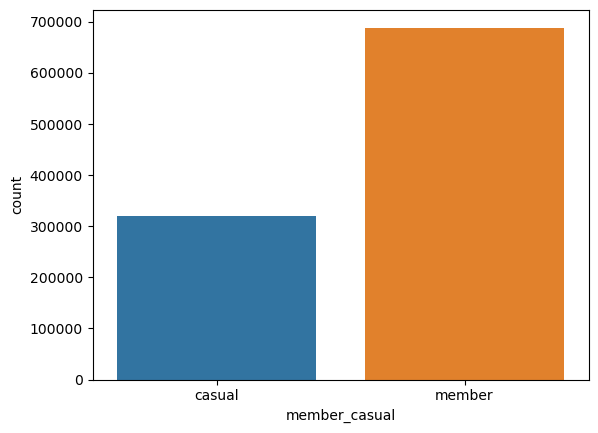

In [13]:
sns.countplot(x='member_casual', data=df)

In [14]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

<AxesSubplot:xlabel='member_casual', ylabel='count'>

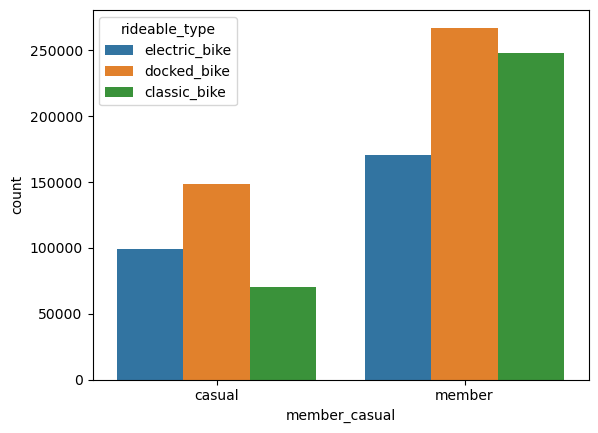

In [61]:
sns.countplot(x='member_casual', data=df, hue='rideable_type')
#sns.countplot(x='rideable_type', data=df, hue='member_casual')

In [22]:
grouped = df.groupby(['member_casual','rideable_type'])['ride_id'].count()
grouped = grouped.reset_index().pivot(index='member_casual', columns='rideable_type', values='ride_id')
grouped

rideable_type,classic_bike,docked_bike,electric_bike
member_casual,,,
casual,70433,149595,99287
member,248181,269503,170992


<AxesSubplot:xlabel='member_casual'>

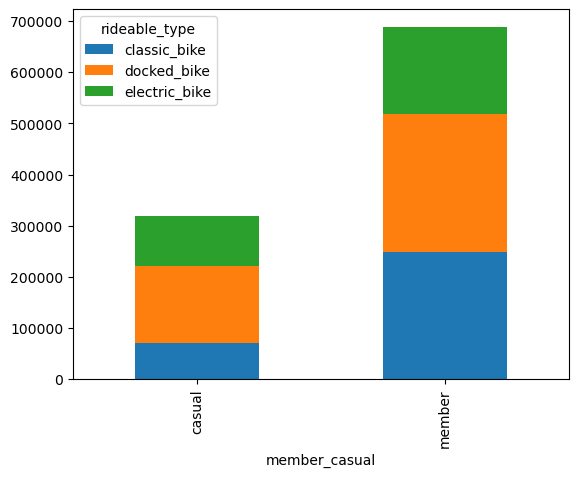

In [23]:
grouped.plot(kind='bar', stacked=True)

In [24]:
grouped_percent = grouped.divide(grouped.sum(axis=1), axis=0)

<AxesSubplot:xlabel='member_casual'>

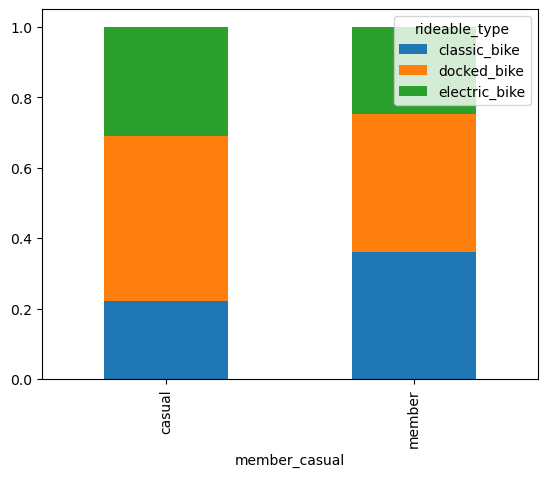

In [25]:
grouped_percent.plot(kind='bar', stacked=True)
#Members like to ride electric bikes more, apparently!

## Check how long the rides of members are, and maybe even how fast they go

In [26]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,41.894434,-87.623379,casual
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,41.900675,-87.662480,casual
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,41.872054,-87.629550,casual
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,41.917744,-87.691392,casual
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,41.876448,-87.620338,casual


In [27]:
# started_at and ended_at are timestamps. Take the difference to get the duration of a ride
df = df.reset_index(drop=True)
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [28]:
df['duration'] = df['ended_at'].subtract(df['started_at'], axis=0)
df['duration']

0         0 days 00:09:40
1         0 days 00:11:19
2         0 days 00:29:01
3         0 days 00:09:15
4         0 days 00:33:27
                ...      
1007986   0 days 00:06:26
1007987   0 days 00:08:36
1007988   0 days 00:27:34
1007989   0 days 00:20:11
1007990   0 days 00:11:28
Name: duration, Length: 1007991, dtype: timedelta64[ns]

In [35]:
df.describe()

,start_lat,start_lng,end_lat,end_lng,duration,duration_seconds
count,1.004617e+06,1.004617e+06,1.004617e+06,1.004617e+06,1004617,1.004617e+06
mean,4.190315e+01,-8.764409e+01,4.190340e+01,-8.764434e+01,0 days 00:18:09.830750425,1.089831e+03
std,4.179246e-02,2.362952e-02,4.182489e-02,2.372806e-02,0 days 00:34:09.797097862,2.049797e+03
min,4.164850e+01,-8.777470e+01,4.164850e+01,-8.777470e+01,0 days 00:00:01,1.000000e+00
25%,4.188200e+01,-8.765694e+01,4.188215e+01,-8.765706e+01,0 days 00:06:29,3.890000e+02
50%,4.189755e+01,-8.764109e+01,4.189766e+01,-8.764154e+01,0 days 00:11:22,6.820000e+02
75%,4.192878e+01,-8.762872e+01,4.192889e+01,-8.762872e+01,0 days 00:20:42,1.242000e+03
max,4.206485e+01,-8.752823e+01,4.206494e+01,-8.752823e+01,0 days 23:59:54,8.639400e+04


In [30]:
df['duration_seconds'] = df['duration'].dt.total_seconds().astype(int)

In [33]:
60*60*24

86400

In [34]:
df = df[df['duration_seconds'] > 0]
df = df[df['duration_seconds'] < 86400]

<AxesSubplot:xlabel='duration_seconds', ylabel='Count'>

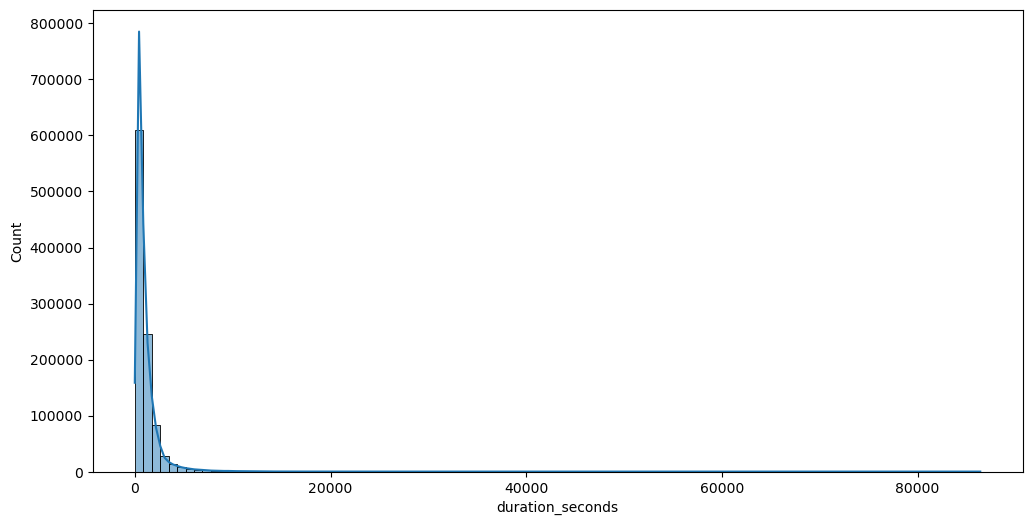

In [54]:
plt.figure(figsize=(12,6))
sns.histplot(df['duration_seconds'], bins=100, kde=True)

<AxesSubplot:xlabel='member_casual'>

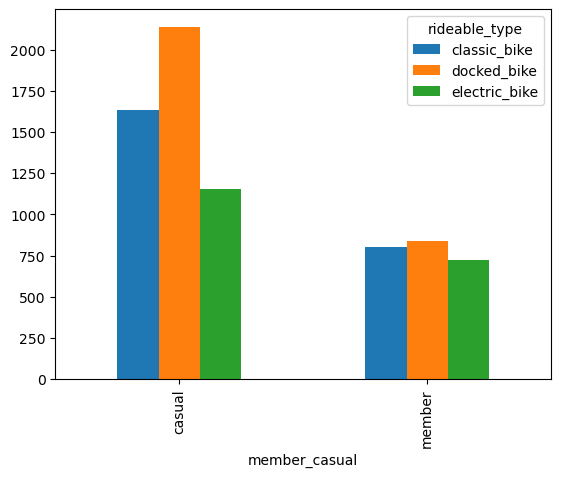

In [75]:
grouped = df.groupby(['member_casual','rideable_type']).mean()['duration_seconds']
grouped = grouped.reset_index().pivot(index='member_casual', columns='rideable_type', values='duration_seconds')
grouped.plot(kind='bar')

## Explore how the behavior varies across weekday/weekends

In [87]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_seconds,Weekday
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,41.894434,-87.623379,casual,0 days 00:09:40,580,6
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,41.900675,-87.662480,casual,0 days 00:11:19,679,6
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,41.872054,-87.629550,casual,0 days 00:29:01,1741,6
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,41.917744,-87.691392,casual,0 days 00:09:15,555,6
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,41.876448,-87.620338,casual,0 days 00:33:27,2007,6


In [86]:
df['Weekday'] = df['started_at'].dt.dayofweek

<AxesSubplot:xlabel='Weekday', ylabel='count'>

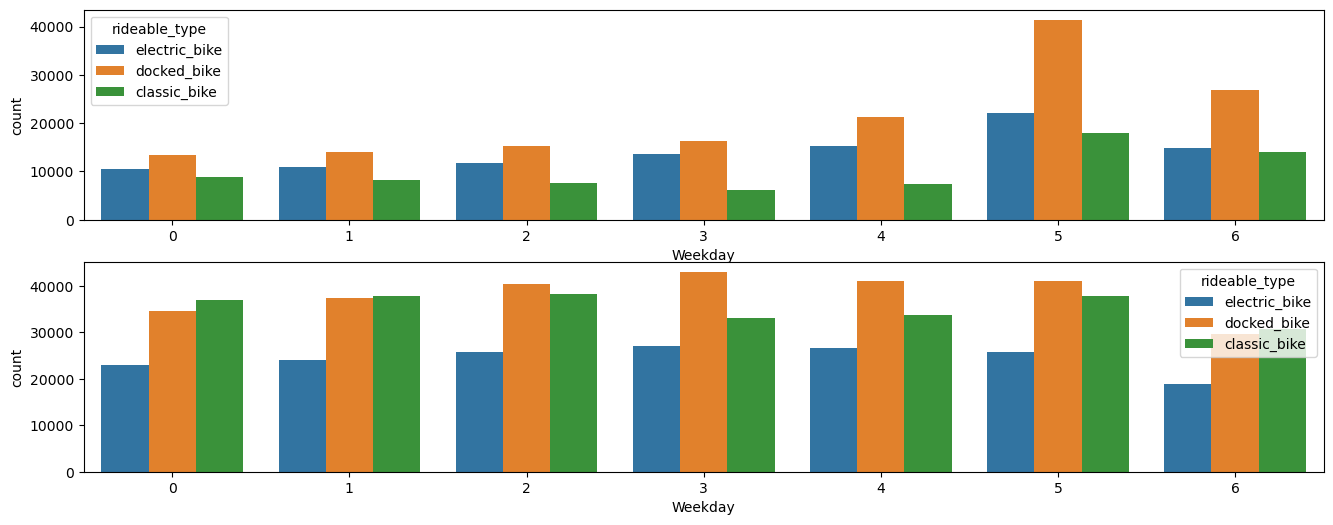

In [97]:
plt.figure(figsize=(16,6))
plt.subplot(2,1,1)
sns.countplot(x='Weekday', data=df[df['member_casual'] == 'casual'], hue='rideable_type')
plt.subplot(2,1,2)
sns.countplot(x='Weekday', data=df[df['member_casual'] == 'member'], hue='rideable_type')
#Clearly observable that casual members like to ride more on weekends, while members ride every day

## Explore how the behavior changes across daytimes

In [98]:
df['daytime'] = 'morning'
df.loc[(df['started_at'].dt.hour >= 6) & (df['started_at'].dt.hour < 11), 'daytime'] = 'morning'
df.loc[(df['started_at'].dt.hour >= 11) & (df['started_at'].dt.hour < 17), 'daytime'] = 'day'
df.loc[(df['started_at'].dt.hour >= 17) & (df['started_at'].dt.hour < 6), 'daytime'] = 'night'

<AxesSubplot:xlabel='daytime', ylabel='count'>

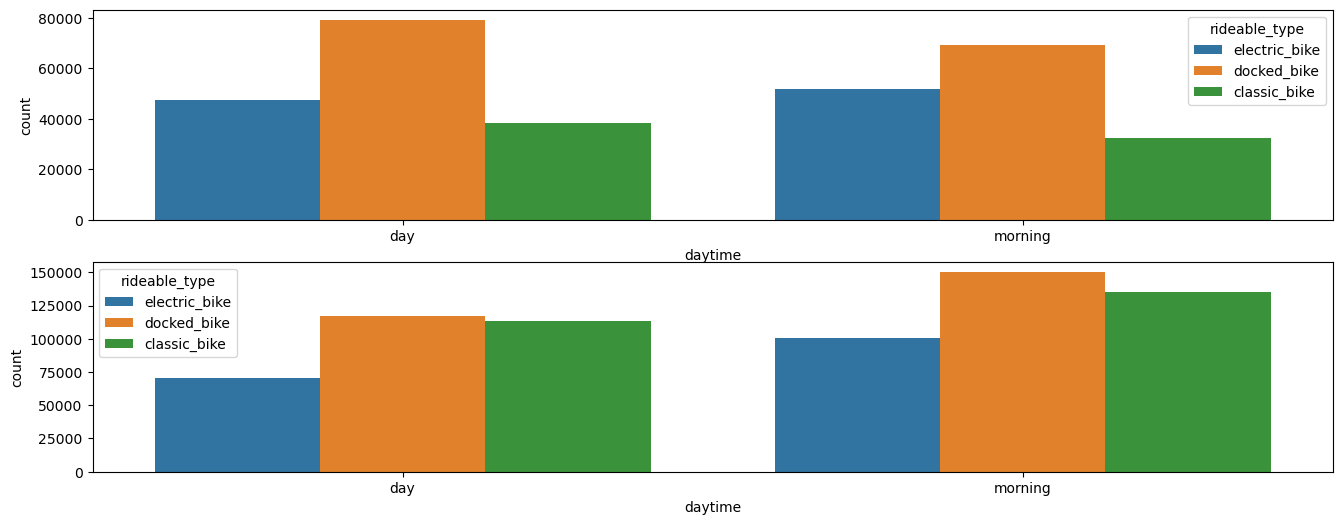

In [100]:
plt.figure(figsize=(16,6))
plt.subplot(2,1,1)
sns.countplot(x='daytime', data=df[df['member_casual'] == 'casual'], hue='rideable_type')
plt.subplot(2,1,2)
sns.countplot(x='daytime', data=df[df['member_casual'] == 'member'], hue='rideable_type')

## Explore distance of every ride (very hard since only long and lat are given...)

In [103]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,duration_seconds,Weekday,daytime
0,BD0A6FF6FFF9B921,electric_bike,2020-11-01 13:36:00,2020-11-01 13:45:40,Dearborn St & Erie St,110.0,St. Clair St & Erie St,211.0,41.894177,-87.629127,41.894434,-87.623379,casual,0 days 00:09:40,580,6,day
1,96A7A7A4BDE4F82D,electric_bike,2020-11-01 10:03:26,2020-11-01 10:14:45,Franklin St & Illinois St,672.0,Noble St & Milwaukee Ave,29.0,41.890959,-87.635343,41.900675,-87.662480,casual,0 days 00:11:19,679,6,morning
2,C61526D06582BDC5,electric_bike,2020-11-01 00:34:05,2020-11-01 01:03:06,Lake Shore Dr & Monroe St,76.0,Federal St & Polk St,41.0,41.880983,-87.616754,41.872054,-87.629550,casual,0 days 00:29:01,1741,6,morning
3,E533E89C32080B9E,electric_bike,2020-11-01 00:45:16,2020-11-01 00:54:31,Leavitt St & Chicago Ave,659.0,Stave St & Armitage Ave,185.0,41.895499,-87.682013,41.917744,-87.691392,casual,0 days 00:09:15,555,6,morning
4,1C9F4EF18C168C60,electric_bike,2020-11-01 15:43:25,2020-11-01 16:16:52,Buckingham Fountain,2.0,Buckingham Fountain,2.0,41.876497,-87.620358,41.876448,-87.620338,casual,0 days 00:33:27,2007,6,day
